## About Diabetes Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes,
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage.2
From the data set in the (.csv) File We can find several variables, some of them are independent
(several medical predictor variables) and only one target dependent variable (Outcome).

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
Diabetes = pd.read_csv("C:/Users/HP/Downloads/diabetes.csv")
Diabetes.shape

(768, 9)

In [3]:
Diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


For Each Attribute: (all numeric-valued)
1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

Class Distribution: (class value **1** is interpreted as "**tested positive for
diabetes**")

In [4]:
skewness = Diabetes.skew()
skewness

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [5]:
Diabetes.describe().append(skewness.rename('skewness')).transpose()

,count,mean,std,min,25%,50%,75%,max,skewness
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00,0.901674
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00,0.173754
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00,-1.843608
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00,0.109372
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00,2.272251
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10,-0.428982
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42,1.919911
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00,1.129597
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00,0.635017


In [6]:
Diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
Diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
Diabetes.rename(columns={"DiabetesPedigreeFunction" : "DPF"}, inplace = True)

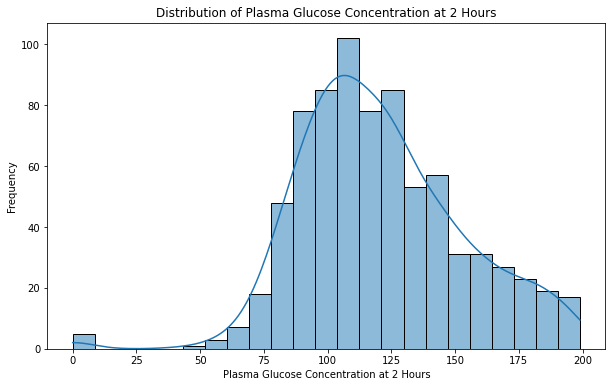

In [9]:
plt.figure(figsize=(10,6 ))
sns.histplot(Diabetes['Glucose'], kde=True)
plt.xlabel('Plasma Glucose Concentration at 2 Hours')
plt.ylabel('Frequency')
plt.title('Distribution of Plasma Glucose Concentration at 2 Hours')
plt.show()

In [10]:
high_glucose = Diabetes['Glucose'][Diabetes['Glucose'] > 140]
high_glucose

0      148
2      183
8      197
11     168
13     189
      ... 
749    162
753    181
754    154
759    190
761    170
Name: Glucose, Length: 192, dtype: int64

The 2-hour plasma glucose level <140 mg/dL is considered normal

The 2-hour plasma glucose level ≥200 mg/dL indicates diabetes

In [11]:
high_glucose.count()

192

In [12]:
Indicate =  Diabetes['Glucose'][Diabetes['Glucose'] >= 200]
Indicate

Series([], Name: Glucose, dtype: int64)

In [13]:
correlation_matrix = Diabetes.corr()
glucose_correlation = correlation_matrix['Glucose']

In [14]:
glucose_correlation

Pregnancies      0.129459
Glucose          1.000000
BloodPressure    0.152590
SkinThickness    0.057328
Insulin          0.331357
BMI              0.221071
DPF              0.137337
Age              0.263514
Outcome          0.466581
Name: Glucose, dtype: float64

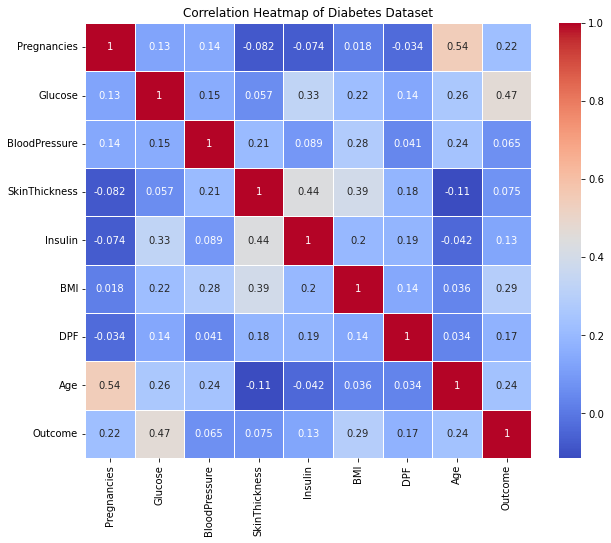

In [15]:
correlation_matrix = Diabetes.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Diabetes Dataset')
plt.show()

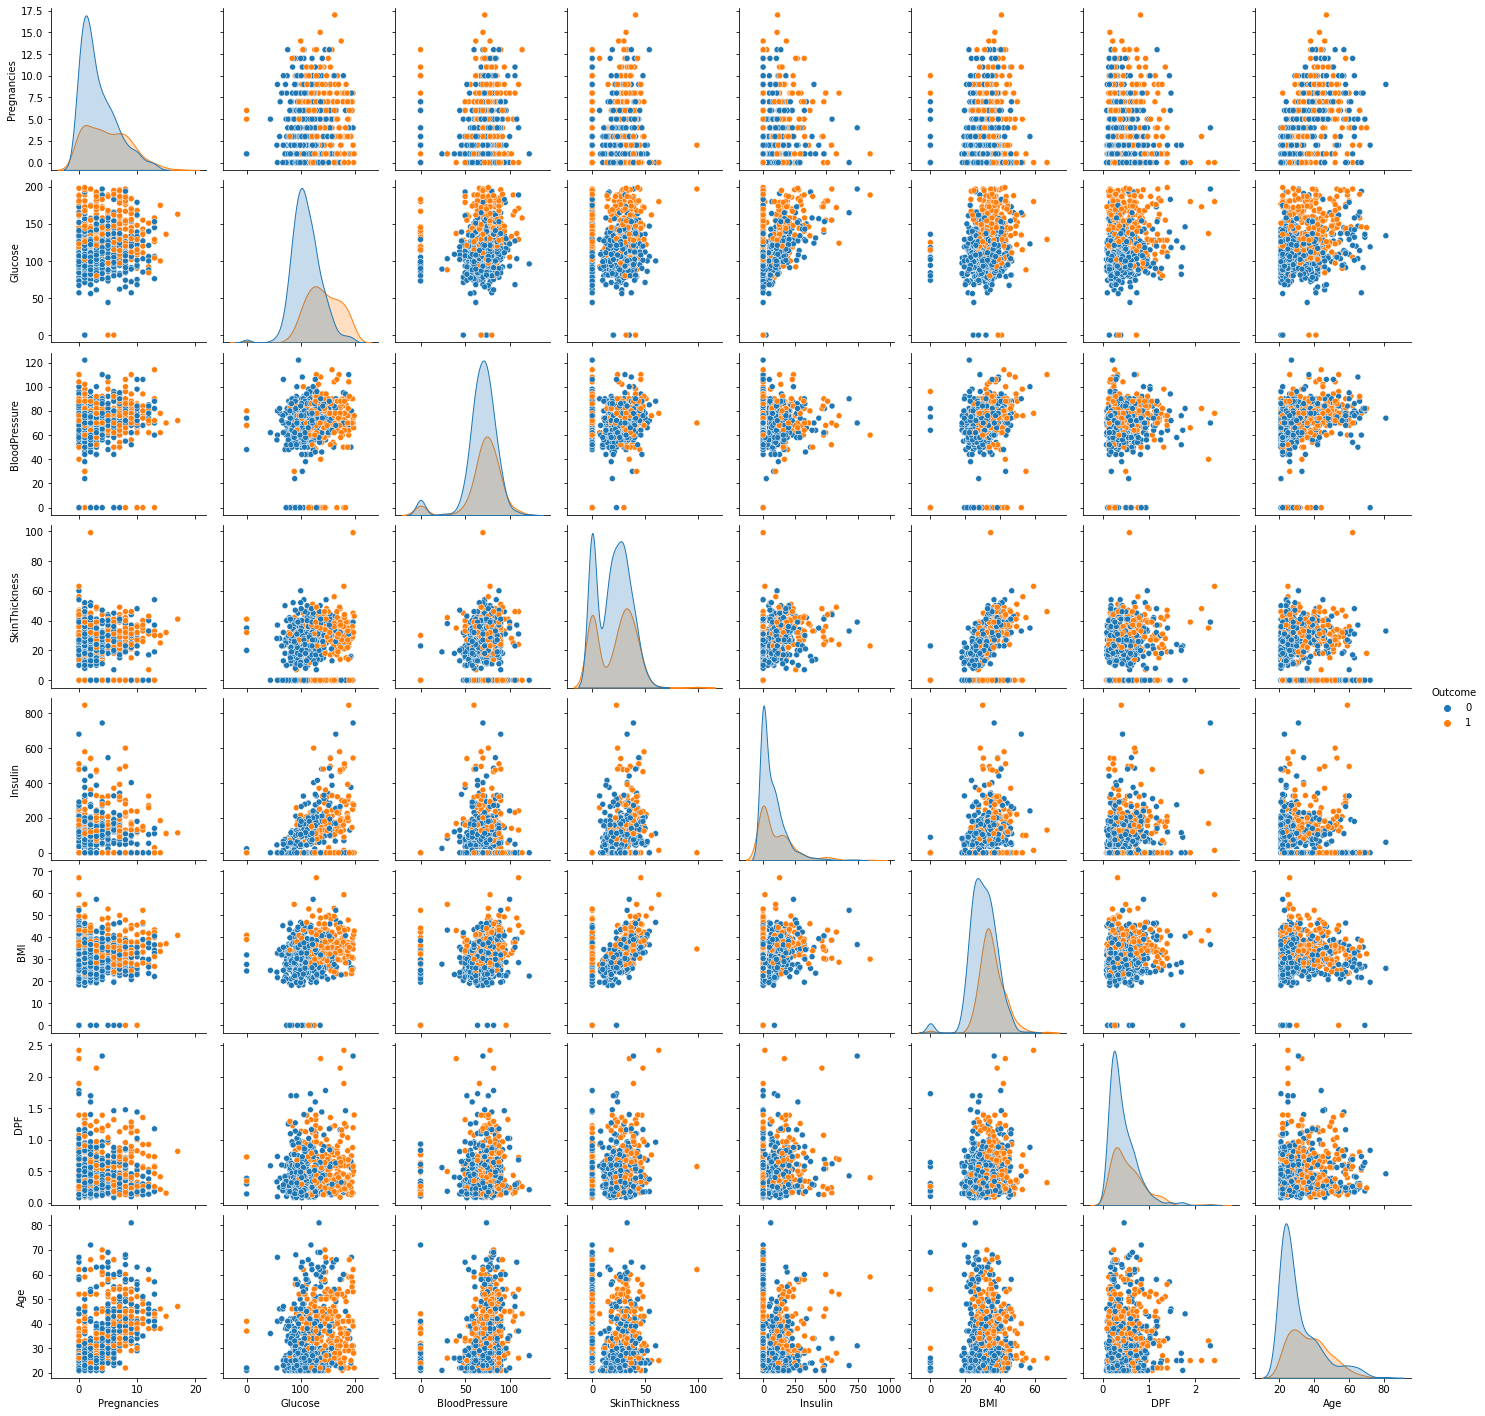

In [16]:
sns.pairplot(Diabetes, diag_kind='auto', hue='Outcome', kind='scatter')
plt.show()

In [17]:
skewness = Diabetes.skew()
skewness

Pregnancies      0.901674
Glucose          0.173754
BloodPressure   -1.843608
SkinThickness    0.109372
Insulin          2.272251
BMI             -0.428982
DPF              1.919911
Age              1.129597
Outcome          0.635017
dtype: float64

In [18]:
Diabetes.describe().append(skewness.rename('skewness'))

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000
skewness,0.901674,0.173754,-1.843608,0.109372,2.272251,-0.428982,1.919911,1.129597,0.635017


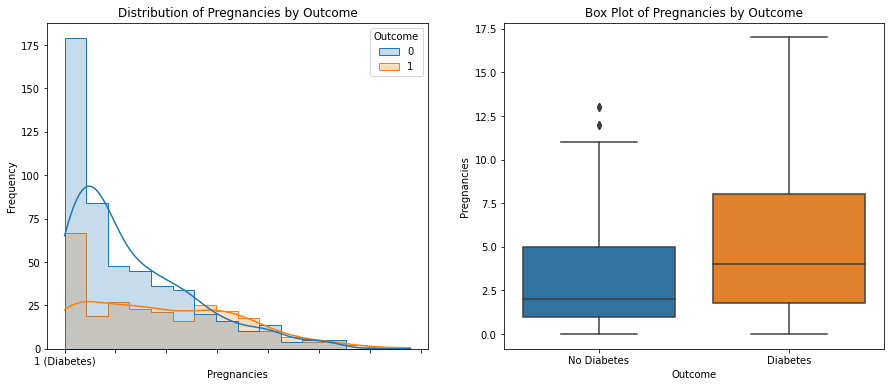

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=Diabetes, x='Pregnancies', hue='Outcome',kde = True, element='step', common_norm=False, ax=axes[0])

axes[0].set_title('Distribution of Pregnancies by Outcome')
axes[0].set_xlabel('Pregnancies')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(['0 (No Diabetes)', '1 (Diabetes)'])



sns.boxplot(data=Diabetes, x='Outcome', y='Pregnancies', ax=axes[1])

axes[1].set_title('Box Plot of Pregnancies by Outcome')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('Pregnancies')
axes[1].set_xticks([0, 1], ['No Diabetes', 'Diabetes'])

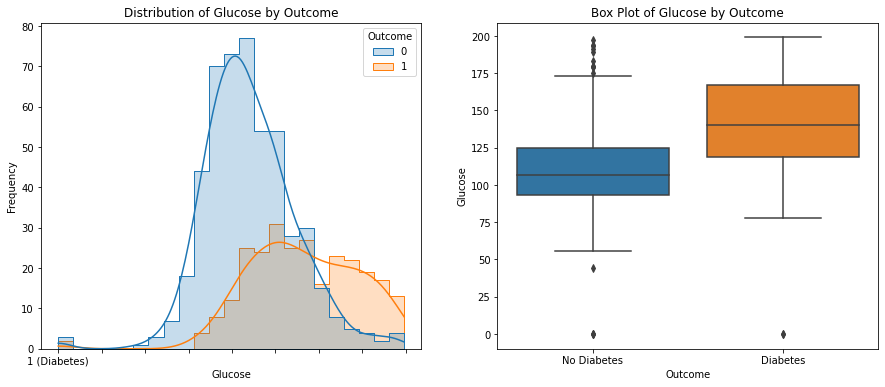

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=Diabetes, x='Glucose', hue='Outcome',kde = True, element='step', common_norm=False, ax=axes[0])

axes[0].set_title('Distribution of Glucose by Outcome')
axes[0].set_xlabel('Glucose')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(['0 (No Diabetes)', '1 (Diabetes)'])



sns.boxplot(data=Diabetes, x='Outcome', y='Glucose', ax=axes[1])

axes[1].set_title('Box Plot of Glucose by Outcome')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('Glucose')
axes[1].set_xticks([0, 1], ['No Diabetes', 'Diabetes'])

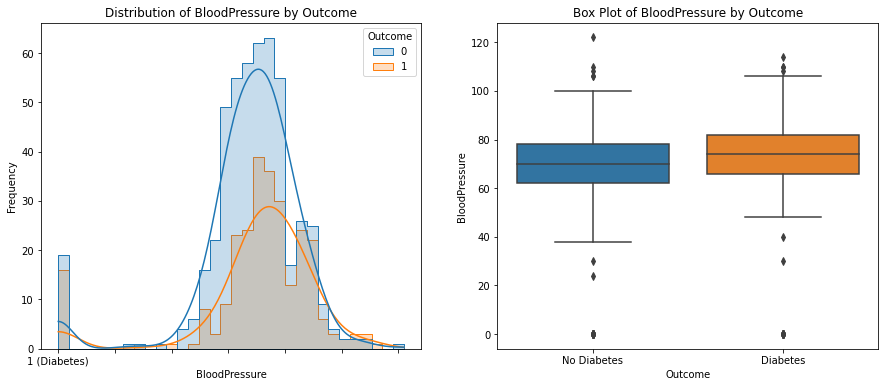

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=Diabetes, x='BloodPressure', hue='Outcome',kde = True, element='step', common_norm=False, ax=axes[0])

axes[0].set_title('Distribution of BloodPressure by Outcome')
axes[0].set_xlabel('BloodPressure')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(['0 (No Diabetes)', '1 (Diabetes)'])


sns.boxplot(data=Diabetes, x='Outcome', y='BloodPressure', ax=axes[1])

axes[1].set_title('Box Plot of BloodPressure by Outcome')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('BloodPressure')
axes[1].set_xticks([0, 1], ['No Diabetes', 'Diabetes'])

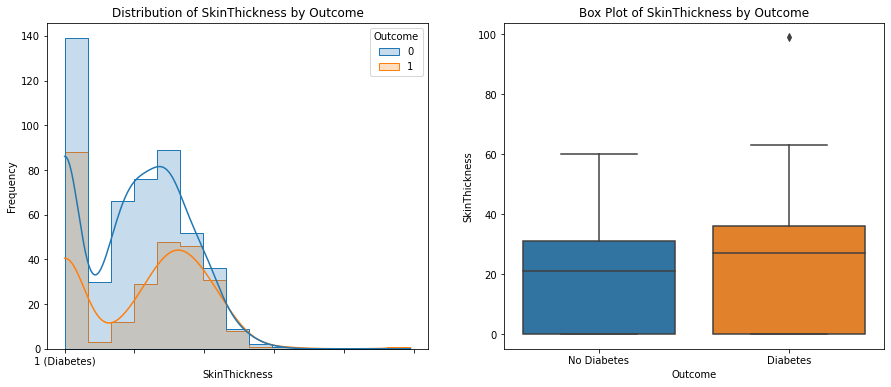

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=Diabetes, x='SkinThickness', hue='Outcome',kde = True, element='step', common_norm=False, ax=axes[0])

axes[0].set_title('Distribution of SkinThickness by Outcome')
axes[0].set_xlabel('SkinThickness')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(['0 (No Diabetes)', '1 (Diabetes)'])


sns.boxplot(data=Diabetes, x='Outcome', y='SkinThickness', ax=axes[1])

axes[1].set_title('Box Plot of SkinThickness by Outcome')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('SkinThickness')
axes[1].set_xticks([0, 1], ['No Diabetes', 'Diabetes'])

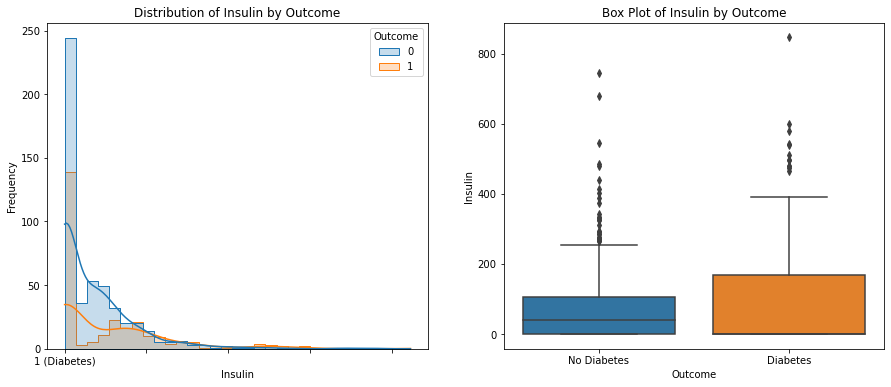

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=Diabetes, x='Insulin', hue='Outcome',kde = True, element='step', common_norm=False, ax=axes[0])

axes[0].set_title('Distribution of Insulin by Outcome')
axes[0].set_xlabel('Insulin')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(['0 (No Diabetes)', '1 (Diabetes)'])


sns.boxplot(data=Diabetes, x='Outcome', y='Insulin', ax=axes[1])

axes[1].set_title('Box Plot of Insulin by Outcome')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('Insulin')
axes[1].set_xticks([0, 1], ['No Diabetes', 'Diabetes'])

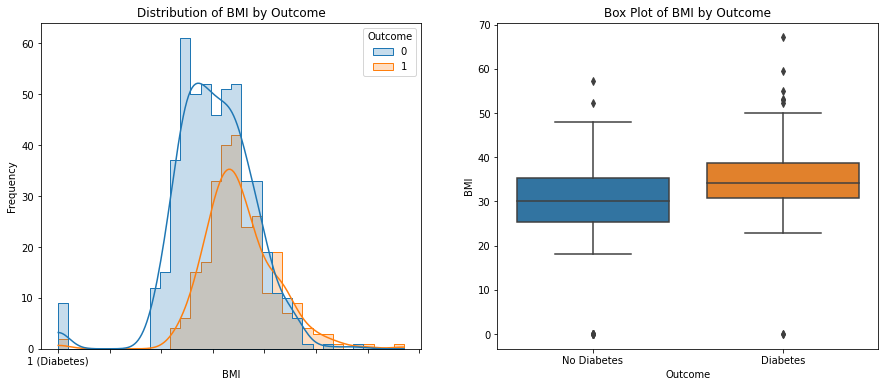

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=Diabetes, x='BMI', hue='Outcome',kde = True, element='step', common_norm=False, ax=axes[0])

axes[0].set_title('Distribution of BMI by Outcome')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(['0 (No Diabetes)', '1 (Diabetes)'])


sns.boxplot(data=Diabetes, x='Outcome', y='BMI', ax=axes[1])

axes[1].set_title('Box Plot of BMI by Outcome')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('BMI')
axes[1].set_xticks([0, 1], ['No Diabetes', 'Diabetes'])

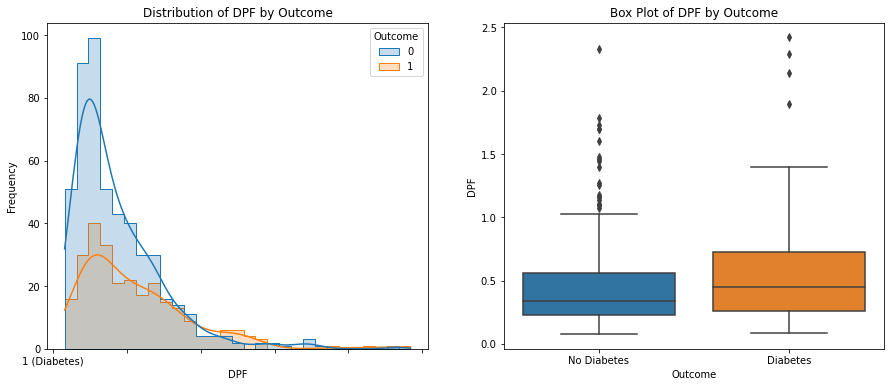

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=Diabetes, x='DPF', hue='Outcome',kde = True, element='step', common_norm=False, ax=axes[0])

axes[0].set_title('Distribution of DPF by Outcome')
axes[0].set_xlabel('DPF')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(['0 (No Diabetes)', '1 (Diabetes)'])


sns.boxplot(data=Diabetes, x='Outcome', y='DPF', ax=axes[1])

axes[1].set_title('Box Plot of DPF by Outcome')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('DPF')
axes[1].set_xticks([0, 1], ['No Diabetes', 'Diabetes'])

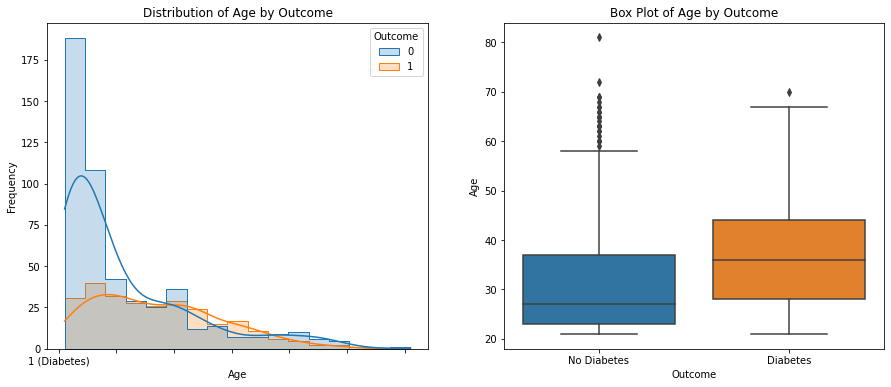

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(data=Diabetes, x='Age', hue='Outcome',kde = True, element='step', common_norm=False, ax=axes[0])

axes[0].set_title('Distribution of Age by Outcome')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_xticklabels(['0 (No Diabetes)', '1 (Diabetes)'])


sns.boxplot(data=Diabetes, x='Outcome', y='Age', ax=axes[1])

axes[1].set_title('Box Plot of Age by Outcome')
axes[1].set_xlabel('Outcome')
axes[1].set_ylabel('Age')
axes[1].set_xticks([0, 1], ['No Diabetes', 'Diabetes'])

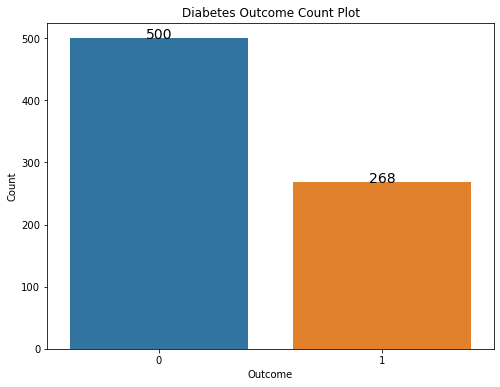

In [27]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=Diabetes, x='Outcome')


for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=14, color='black')

plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Diabetes Outcome Count Plot')

plt.show()

In [28]:
features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

In [29]:
def hist_box(feature,data):
    print("histogram and boxplot for" ,feature)
    plt.figure(figsize=(20,10))
    plt.subplot(2,1,1)
    sns.histplot(x=feature,data=Diabetes)
    plt.axvline(Diabetes[feature].mean(),color='g',linestyle='--')
    
    plt.subplot(2,1,2)
    sns.boxplot(x=feature,data=Diabetes,palette="Set1",showmeans=True)
    plt.show()

histogram and boxplot for Pregnancies


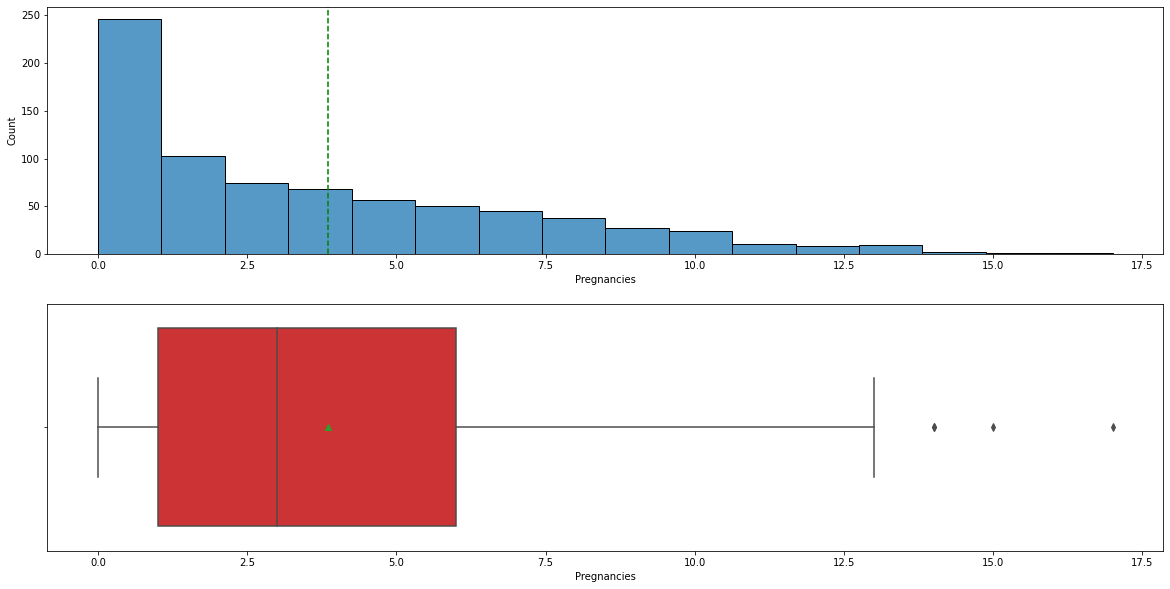

histogram and boxplot for Glucose


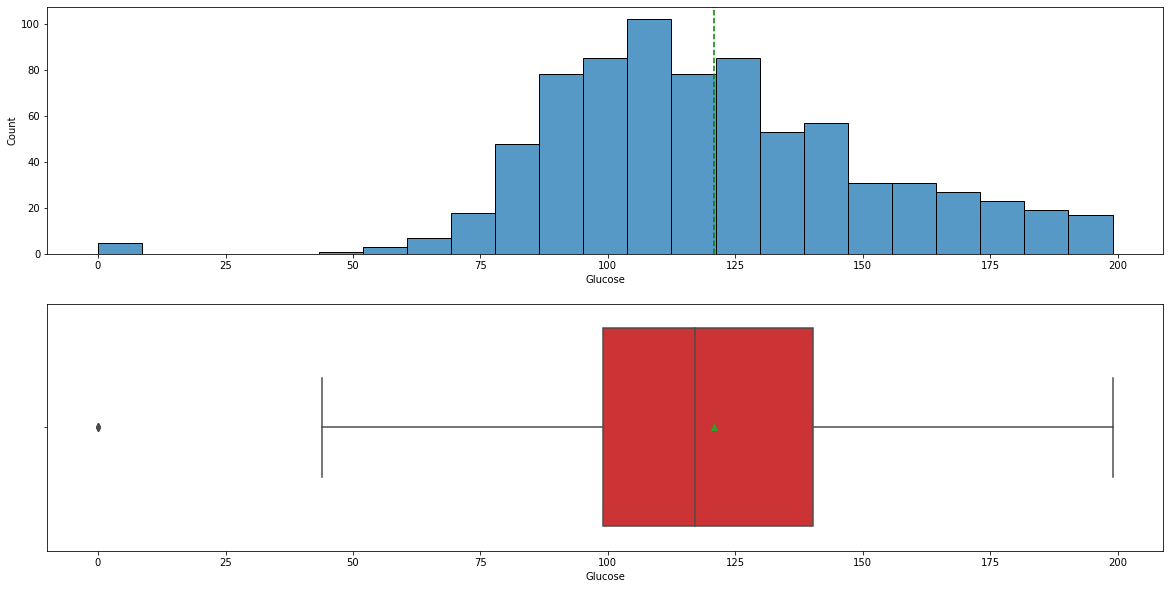

histogram and boxplot for BloodPressure


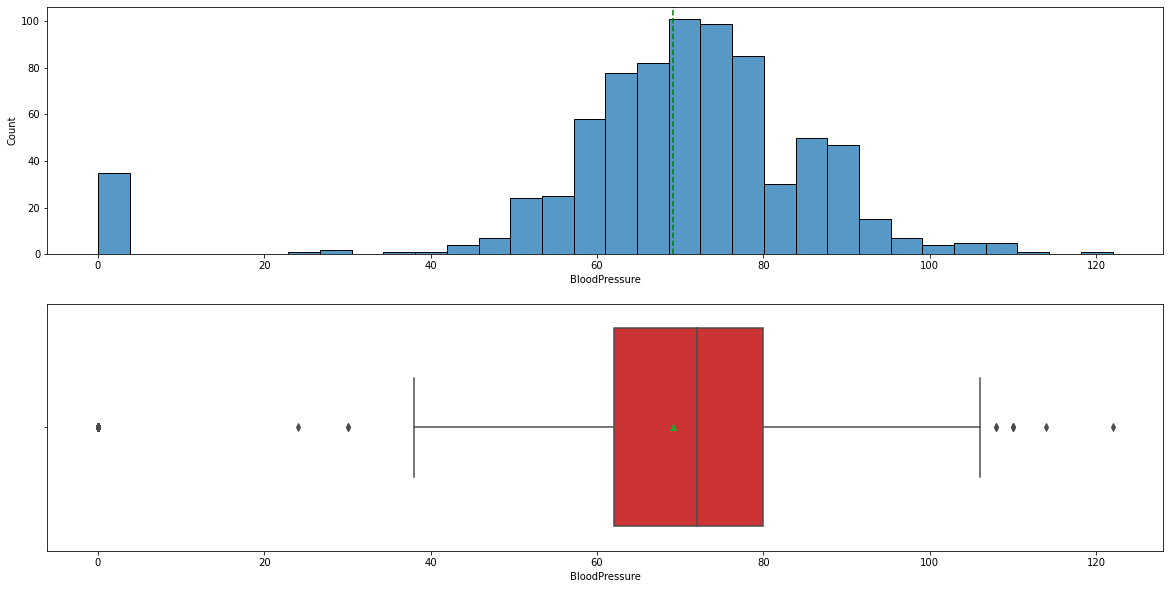

histogram and boxplot for SkinThickness


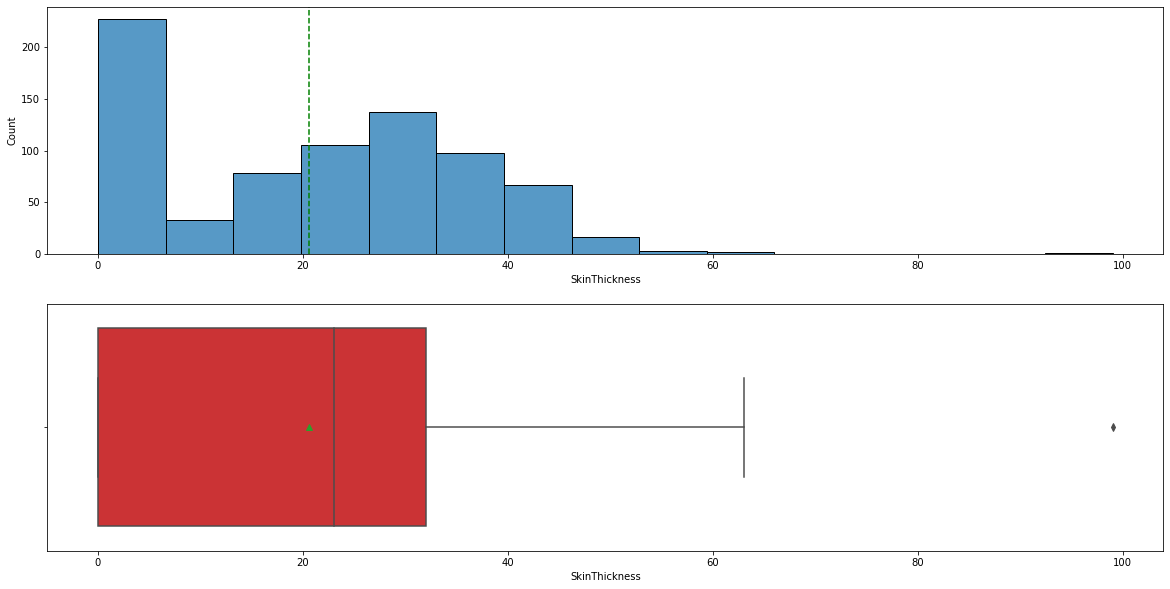

histogram and boxplot for Insulin


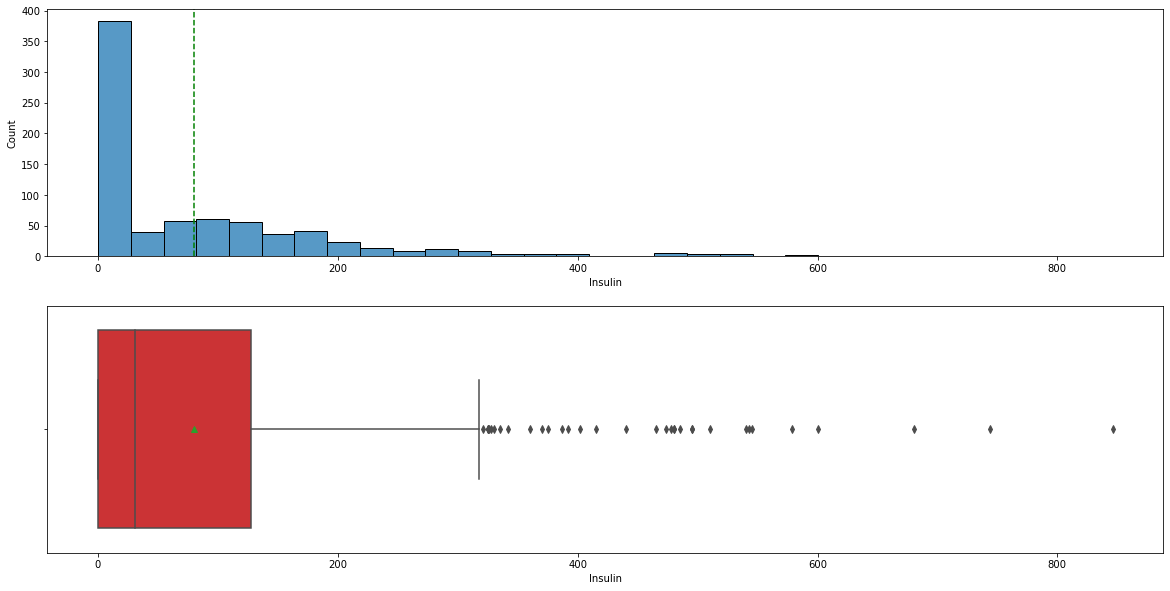

histogram and boxplot for BMI


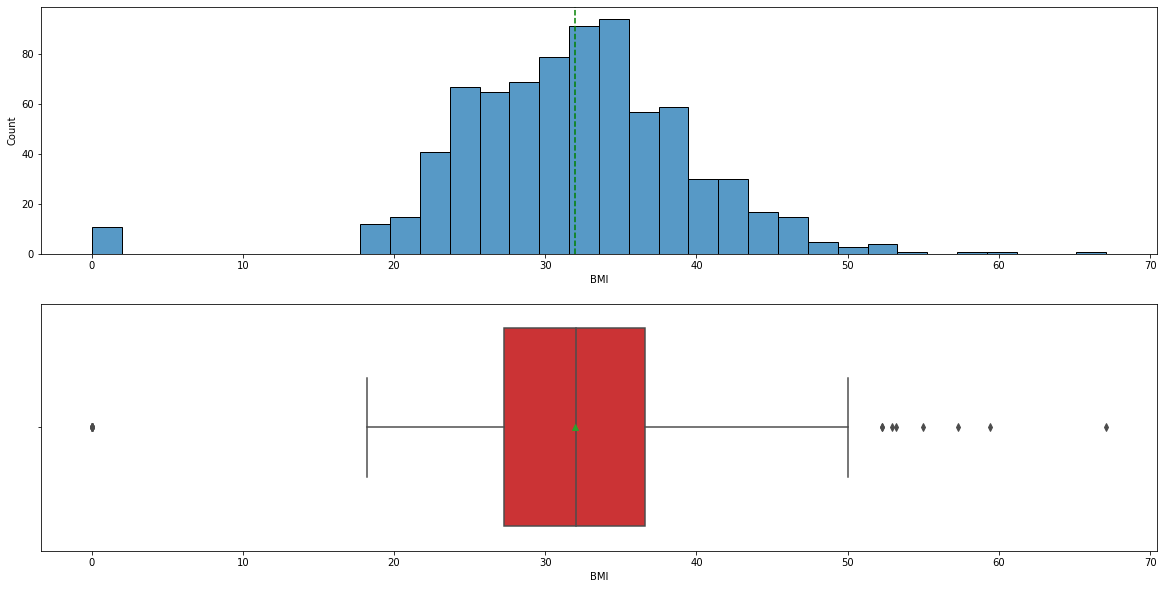

histogram and boxplot for DPF


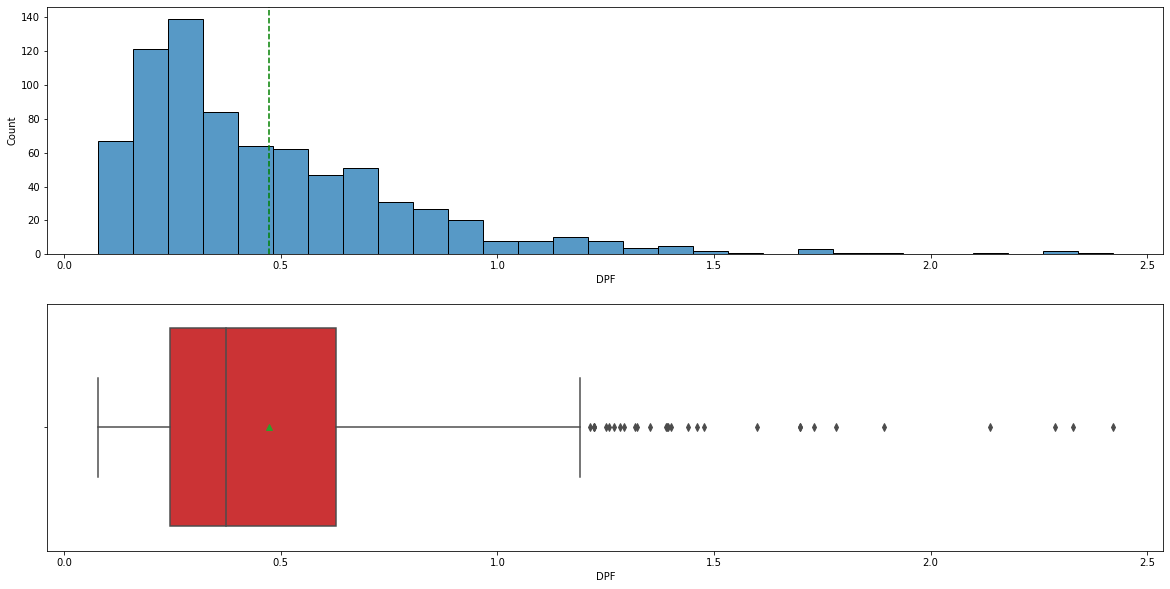

histogram and boxplot for Age


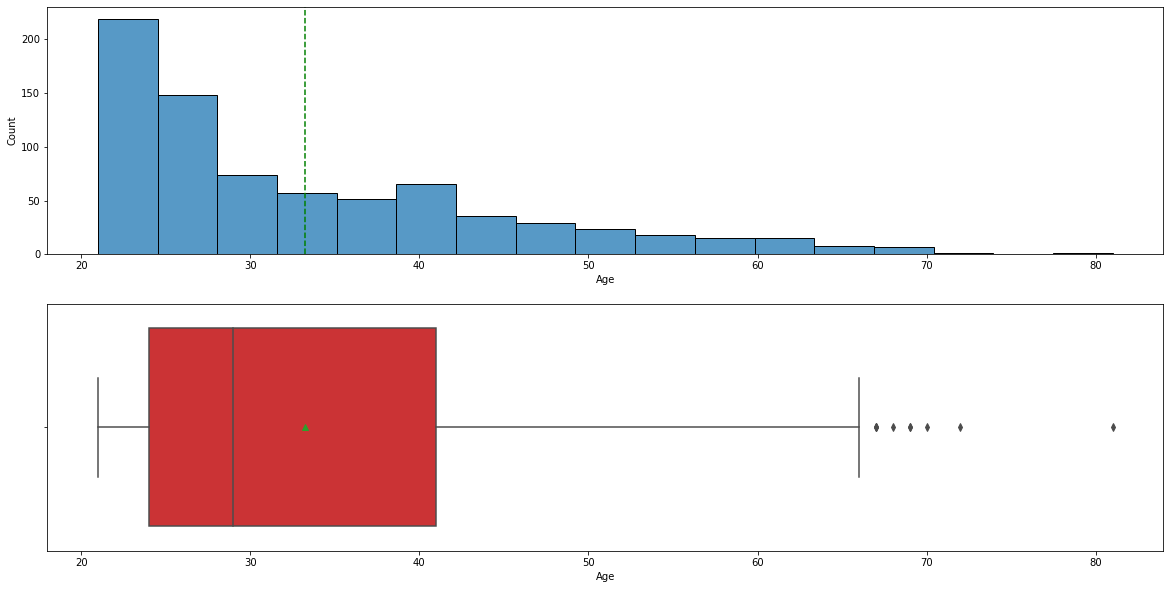

histogram and boxplot for Outcome


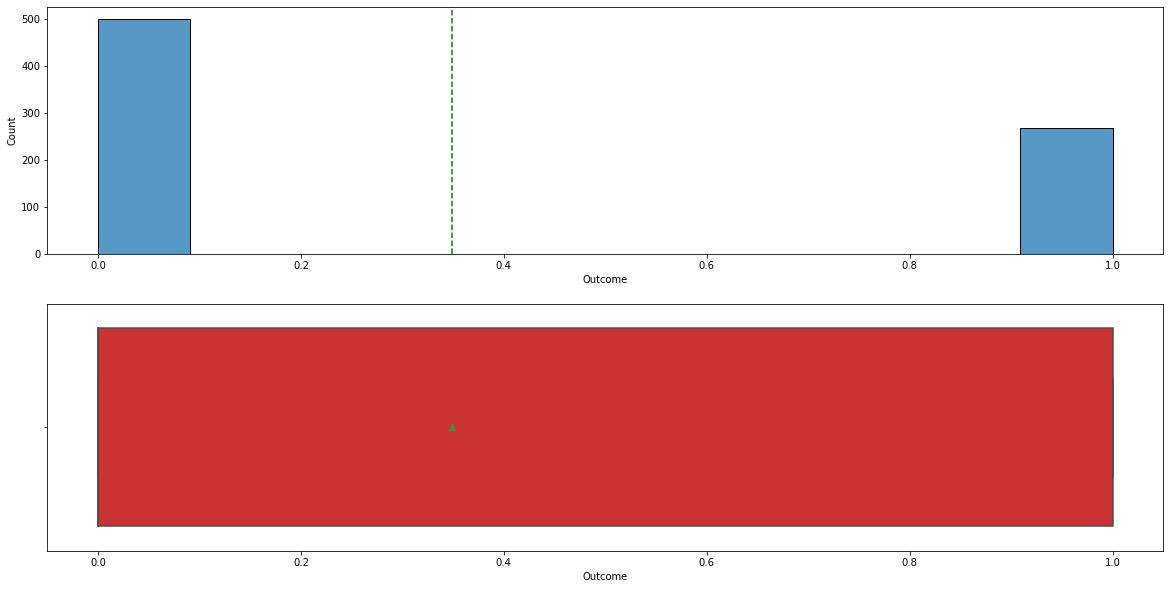

In [30]:
for col in Diabetes.select_dtypes(exclude="O"):
    hist_box(col,Diabetes)

### Observations
1. Insulin , DPF and Age are highly right skewed and having heavy amoiunt of outliers .
2. Age and Pregnancies are also right skewed with some extreme values .
3. Outcome variable is highly imbalanced(Yes:No = 1:0) , we need to solve for data imbalance
4. Missing values have been taken care of

# Logistic Regression Model

In [31]:
X=Diabetes.drop("Outcome",axis=1)
y=Diabetes['Outcome']

In [32]:
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
Scaler.fit(X)
X = Scaler.transform(X)


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.20,random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [35]:
model.coef_

array([[ 0.21621911,  1.06930435, -0.2587175 ,  0.0472661 , -0.19919621,
         0.7920862 ,  0.22695841,  0.43005814]])

In [36]:
model.intercept_

array([-0.85571126])

In [37]:
predictions = model.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int64)

In [38]:
train_predictions = model.predict(X_train)
accuracy = accuracy_score(y_train, train_predictions)

print("Accuracy on training data:", accuracy)

Accuracy on training data: 0.7703583061889251


In [39]:
pred=model.predict(X_test)
print(accuracy_score(y_test,pred))

0.7532467532467533


The model is 75% accurate in predicting whether the patient has diabetes or not.